# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd

In [2]:
# Carregando os dados para análise
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
# Mostrando os 5 primeiros registros
df.head(5)

city  area  rooms  bathroom  parking spaces floor     animal  \
0     São Paulo    70      2         1               1     7      acept   
1     São Paulo   320      4         4               0    20      acept   
2  Porto Alegre    80      1         1               1     6      acept   
3  Porto Alegre    51      2         1               0     2      acept   
4     São Paulo    25      1         1               0     1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841  
3                   17        1421  
4                   11         836

In [4]:
# Análisando os tipos de dados das variáveis, se estão declaradas com seus tipos corretamente
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
# Verificando dados faltantes
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
# Verificando informações gerais: quais os indices, quantidade de variáveis(colunas), tipos de dados das variáveis, 
# quantidade de registros(linhas), valores nao nulos, quantidade de memória utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [7]:
# Renomear a variável(coluna) 'rent anount (R$)'
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True) # inplace = True já altera diretamente no DataFrame original

In [8]:
# Verificar a média do valor_aluguel => (soma dos valores) / (contagem dos valores)
df['valor_aluguel'].mean()

3896.247194163861

In [9]:
# Verificar a mediana do valor_aluguel => valor que divide os dados em duas partes de conjuntos iguais
# Quando veriricamos que a media está muito diferente da mediana constatamos a presença de outliers(valores que apresentam grande distanciamento dos demais)
df['valor_aluguel'].median()

2661.0

In [10]:
# Verificar o desvio padrão, se o valor_aluguel é muito esparço => medida de dispersão em torno da media de uma variável aleatória
df['valor_aluguel'].std()

3408.5455176710675

In [11]:
# Fazer uma análise mais descritiva: contagem de registros, media, desvio padrao, valor minimo, valor em 25% dos dados(Q1), valor em 50% dos dados(mediana),
# valor em 75% dos dados(Q3), valor maximo
# Podemos constatar a presença de outliers, a discrepancia entre o dado encontrado em 75%(5000,00) e o dado encontrado no valor maximo(45000,00) 
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

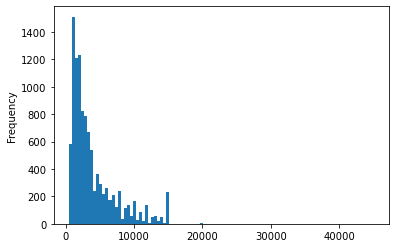

In [12]:
# Plotando um Histograma para análisar a distrubuição dos dados valor_aluguel
# Podemos analisar que a maioria dos valores estão entre 450,00 e 5000,00, e valores outliers que fogem do padrão acima de 5000,00 até 45000,00
df['valor_aluguel'].plot(kind = 'hist', bins= 100)

In [13]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [14]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()


4.624228179818687

## Exploracao multivariáveis

### Perguntas
 
- Qual a cidade com a média de aluguel mais cara? 
- Quantos banheiros existem nas residencias com alugueis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

In [19]:
#Qual a cidade com a média de aluguel mais alta? 
# Agrupar as cidades por seu valor de aluguel, aplicando a mediana => reset_index() trata os indices como coluna => sort_values('valor_aluguel', ascending = False) organiza os valores decrescente
df.groupby('city')['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending = False)

city  valor_aluguel
4       São Paulo    4652.793783
0  Belo Horizonte    3664.127981
3  Rio de Janeiro    3232.904064
1        Campinas    2364.290739
2    Porto Alegre    2337.699916

In [20]:
#Quantos banheiros existem em média nas residencias com alugueis mais altos? 
## definicao: algueis mais altos são valores acima de 5000

# Recebe a classificação 'Alto' se x(valor_aluguel) maior que 5000 senão 'Baixo', iterando em casa x(valor_aluguel) no df['valor_aluguel'], posterioremente armazena em df["aluguel_alto"]
df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]


In [23]:
# Média de banheiros nos imoveis classificados como valor_aluguel "Alto" e "Baixo"
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

In [33]:
# Retorna a quantidade de imoveis que aceitam animais, separados por valor aluguel "Alto" e "Baixo"
# Concluimos que imovel de valor aluguel alto tem alta taxa de aceitação de animais
df.groupby('aluguel_alto')['animal'].value_counts()

aluguel_alto  animal   
Alto          acept        2084
              not acept     455
Baixo         acept        6232
              not acept    1921
Name: animal, dtype: int64

In [36]:
# Retorna a quantidade de imoveis que estao mobiliados, separados por valor aluguel "Alto" e "Baixo"
# Concluimos que imovel de valor aluguel alto nao necessariamente ja vem mobiliado
df.groupby('aluguel_alto')['furniture'].value_counts()

aluguel_alto  furniture    
Alto          not furnished    1661
              furnished         878
Baixo         not furnished    6425
              furnished        1728
Name: furniture, dtype: int64

In [25]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)', 'aluguel_alto'],
      dtype='object')

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [41]:
# Verificando a correlação entre as variáveis valor_aluguel e bathroom => se não passarmos o método para a correlação, por default utiliza o método pearson
# Apenas verificamos a correlação entre variáveis numéricas
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000

In [42]:
# Gera um DataFrame auxiliar com as colunas e os tipos de dados
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [45]:
# A partir do DataFrame aux, cria uma lista onde recebe apenas as colunas com o tipo de dado int64
lista = list(aux[aux['tipos'] == 'int64']['colunas'])
print(lista)

['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']


In [49]:
# Percorre a lista printando a coluna e a correlação dela com a variável valor_aluguel, utilizando o método 'spearman'
for coluna in lista:
    print()
    print(f'{coluna}')
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))


area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000

rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000

bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000

parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000

hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000

valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0

property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000

fire insurance (R$)
  

## Visualização de dados

In [51]:
## !pip install seaborn

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)


In [52]:
import seaborn as sns

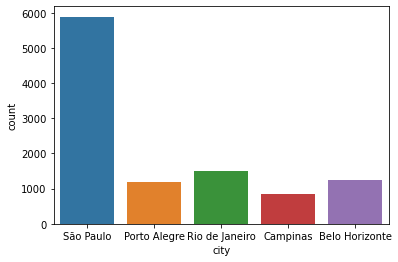

In [53]:
# Retorna um plot com as contagens das cidades => df['city'].value_counts()
sns.countplot(x = 'city', data=df)

In [59]:
import matplotlib.pyplot as plt

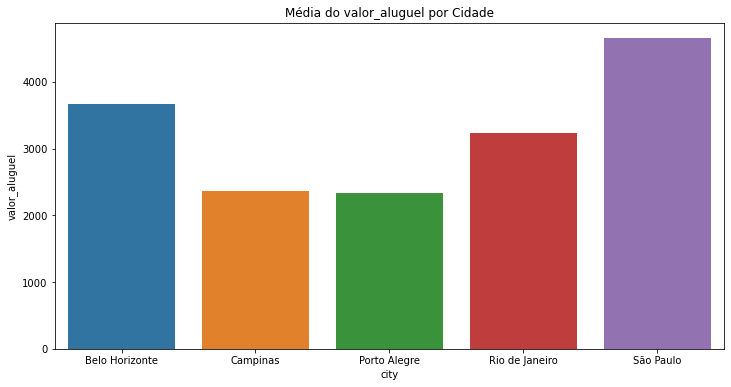

In [66]:
# Retorna um Bar Plot com a média do valor_aluguel por cidade
plt.figure(figsize=(12, 6)) # alterando a dimensão do grafico
sns.barplot(x="city", y="valor_aluguel", data=df.groupby('city')['valor_aluguel'].mean().reset_index())
plt.title("Média do valor_aluguel por Cidade")
plt.show() 

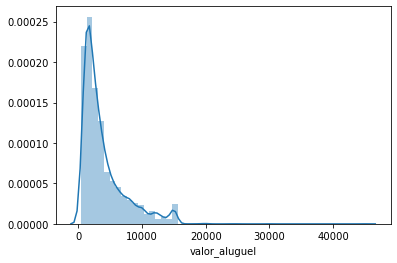

In [67]:
# Plot o Histograma da variável alvo
sns.distplot(df["valor_aluguel"])

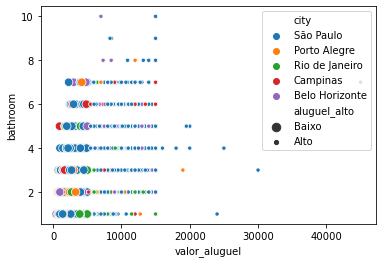

In [70]:
# Plot gráfico de dispersão
# hue = "city" => diferencia, por cores, as cidades -- size = "aluguel_alto" => diferencia, por tamanho, os alugueis altos e baixos
sns.scatterplot(x="valor_aluguel", y="bathroom", hue="city", size="aluguel_alto", data=df)

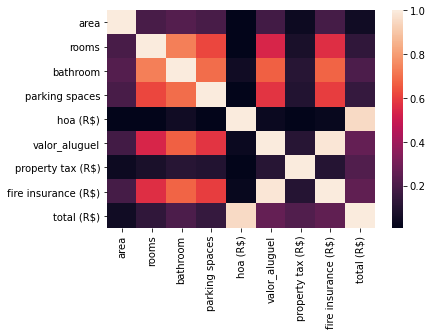

In [71]:
# Mapa de calor analisando as correlações das variáveis
# annot = True => mostra os valores das correlações
sns.heatmap(df.corr(), annot=True)